In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Upgrade pip first
!pip install -U pip

# Install Prophet (new official package)
!pip install prophet


In [42]:
import prophet

In [43]:
df=pd.read_csv('monthly-milk-production-pounds.csv')

In [44]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [45]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [46]:
df.drop(168,axis=0,inplace=True)

In [47]:
df.columns=['ds','y']

<Axes: >

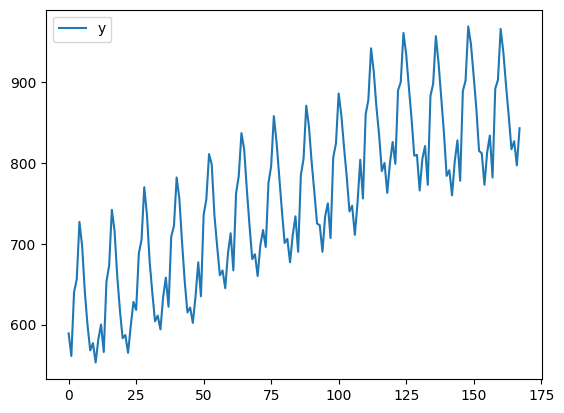

In [48]:
df.plot()

In [49]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [50]:
df['ds']=pd.to_datetime(df['ds'])

<Axes: >

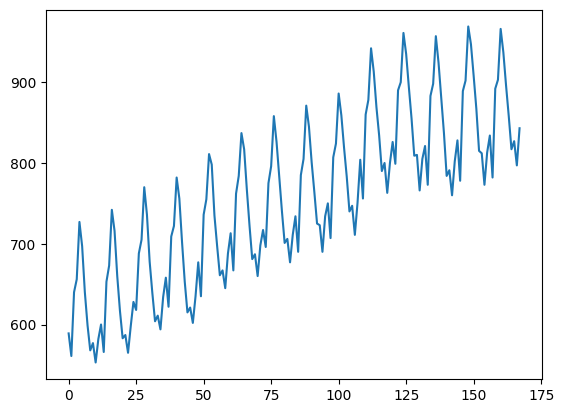

In [51]:
df.y.plot()

In [52]:
df['y'].shift(1)

,y
0,NaN
1,589.0
2,561.0
3,640.0
4,656.0
...,...
163,896.0
164,858.0
165,817.0
166,827.0


# Shifting to make it Stationary

<Axes: >

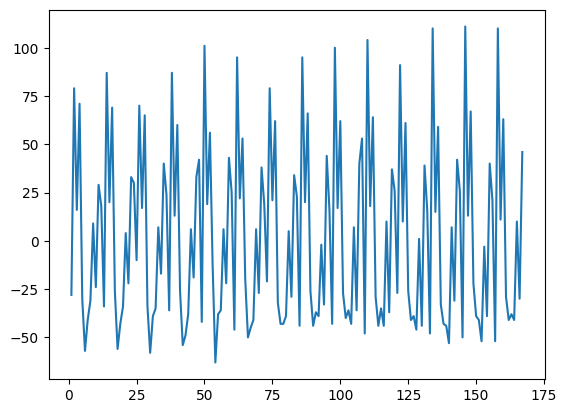

In [53]:
df['y']=df['y']- df['y'].shift(1)
df['y'].plot()

In [54]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [57]:
model=prophet.Prophet()

In [59]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
model

In [61]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [62]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [63]:
#create future dates
future_dates=model.make_future_dataframe(periods=365)
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


# Predictions

In [65]:
predictions=model.predict(future_dates)
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,1.961868,16.903241,36.240720,1.961868,1.961868,24.989953,24.989953,24.989953,24.989953,24.989953,24.989953,0.0,0.0,0.0,26.951822
1,1962-02-01,1.959700,-47.599212,-28.788243,1.959700,1.959700,-40.258678,-40.258678,-40.258678,-40.258678,-40.258678,-40.258678,0.0,0.0,0.0,-38.298978
2,1962-03-01,1.957741,85.355315,104.595029,1.957741,1.957741,93.022092,93.022092,93.022092,93.022092,93.022092,93.022092,0.0,0.0,0.0,94.979833
3,1962-04-01,1.955572,7.599071,26.285578,1.955572,1.955572,14.325273,14.325273,14.325273,14.325273,14.325273,14.325273,0.0,0.0,0.0,16.280845
4,1962-05-01,1.953473,53.167774,71.233438,1.953473,1.953473,60.544371,60.544371,60.544371,60.544371,60.544371,60.544371,0.0,0.0,0.0,62.497844


In [66]:
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,12.923553,3.443558,22.413355
529,1976-11-27,18.378356,8.918724,27.047132
530,1976-11-28,23.967514,14.980703,32.811827
531,1976-11-29,29.578321,20.071196,39.357560
532,1976-11-30,35.092155,25.529139,44.518714


In [67]:
predictions[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,26.951822,16.903241,36.240720
1,1962-02-01,-38.298978,-47.599212,-28.788243
2,1962-03-01,94.979833,85.355315,104.595029
3,1962-04-01,16.280845,7.599071,26.285578
4,1962-05-01,62.497844,53.167774,71.233438


# Plot the real prediciton

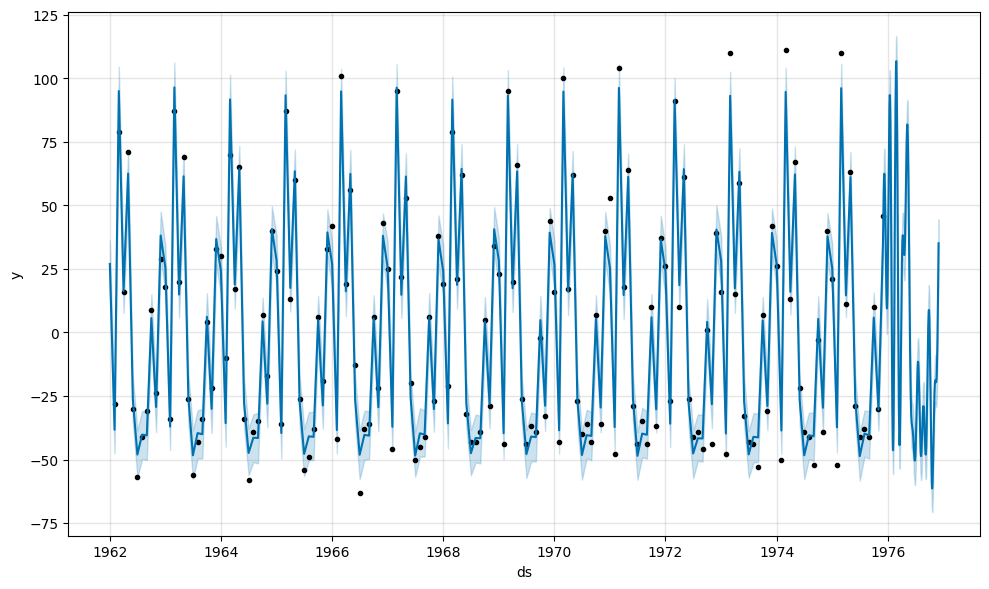

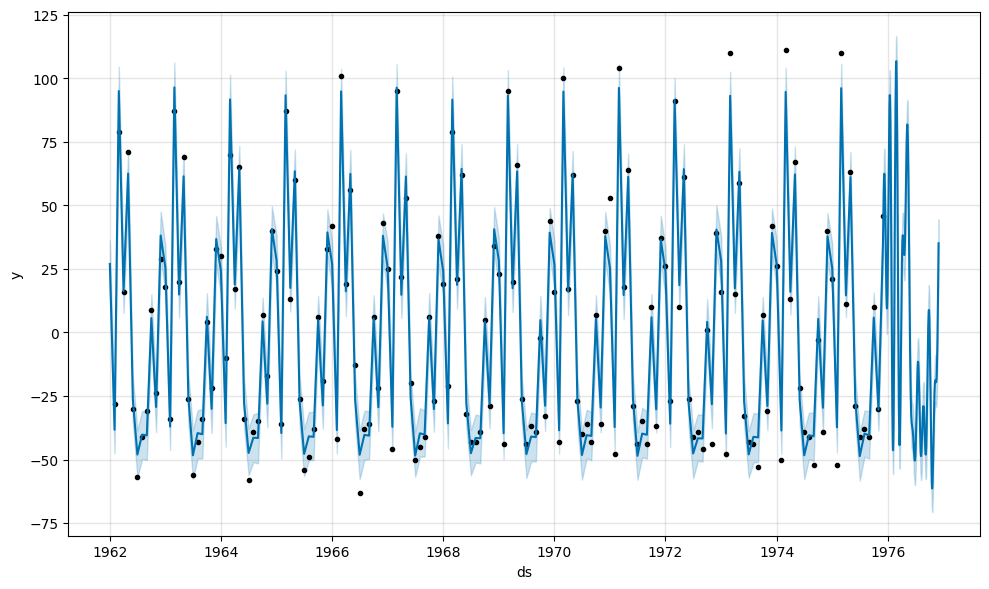

In [68]:
model.plot(predictions)

# Visualize each components [Trends,Weekly]

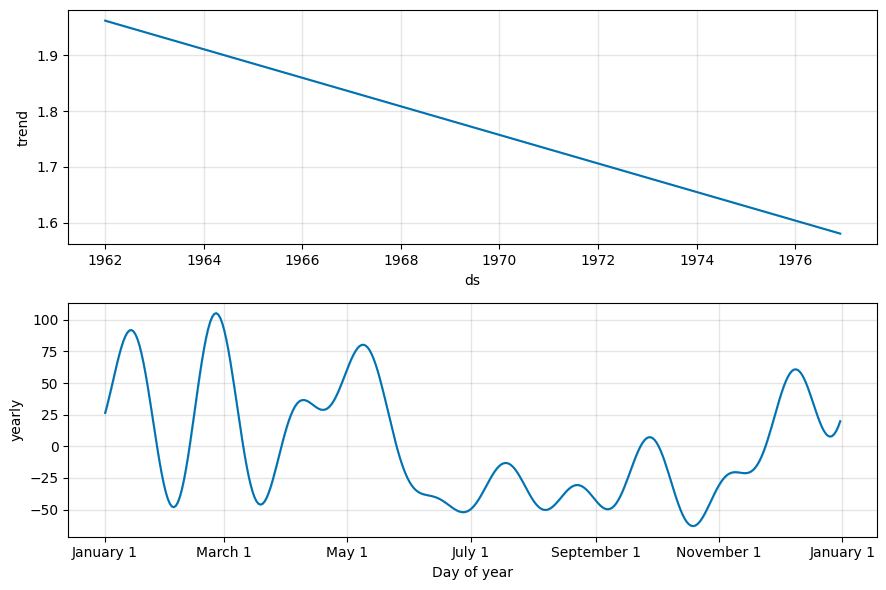

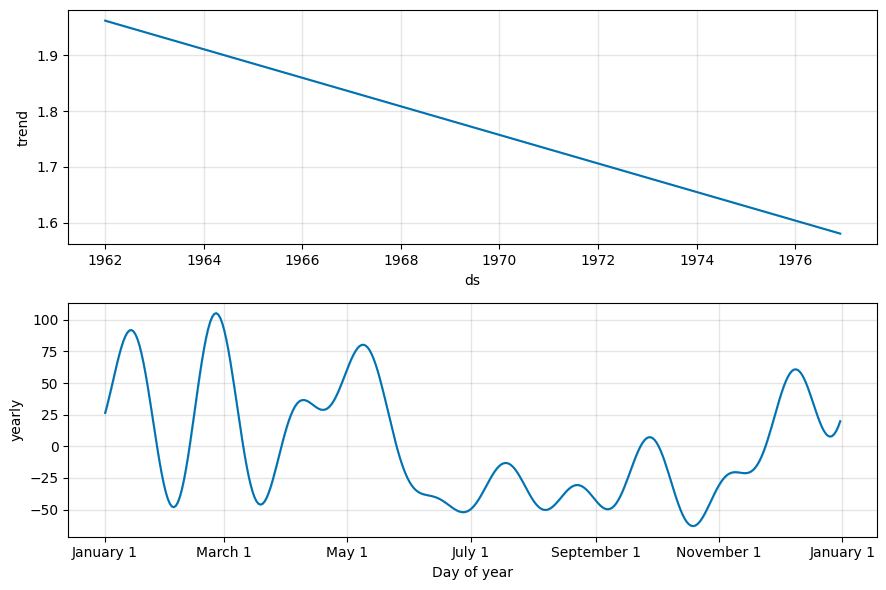

In [69]:
model.plot_components(predictions)

# Cross Validation

In [72]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model,horizon='365 days',period='180 days')
df_cv.head()

INFO:prophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898373,-46.330294,-35.274725,-49.0,1965-07-21
1,1965-09-01,-34.869322,-39.740379,-29.511112,-38.0,1965-07-21
2,1965-10-01,6.103170,0.932067,11.777406,6.0,1965-07-21
3,1965-11-01,-20.281526,-25.475704,-14.692154,-19.0,1965-07-21
4,1965-12-01,36.035431,30.297654,41.433502,33.0,1965-07-21


In [83]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
235,1975-08-01,-40.659613,-50.165855,-31.086111,-38.0,1974-12-01
236,1975-09-01,-40.629071,-50.106825,-31.479685,-41.0,1974-12-01
237,1975-10-01,4.713842,-4.558941,14.068793,10.0,1974-12-01
238,1975-11-01,-30.711897,-39.847511,-22.081895,-30.0,1974-12-01
239,1975-12-01,34.664005,25.655632,43.954077,46.0,1974-12-01


In [ ]:
1964,1968
1962,1965=> train
1965,1975=> test

In [73]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898373,-46.330294,-35.274725,-49.0,1965-07-21
1,1965-09-01,-34.869322,-39.740379,-29.511112,-38.0,1965-07-21
2,1965-10-01,6.103170,0.932067,11.777406,6.0,1965-07-21
3,1965-11-01,-20.281526,-25.475704,-14.692154,-19.0,1965-07-21
4,1965-12-01,36.035431,30.297654,41.433502,33.0,1965-07-21


In [74]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
235,1975-08-01,-40.659613,-50.165855,-31.086111,-38.0,1974-12-01
236,1975-09-01,-40.629071,-50.106825,-31.479685,-41.0,1974-12-01
237,1975-10-01,4.713842,-4.558941,14.068793,10.0,1974-12-01
238,1975-11-01,-30.711897,-39.847511,-22.081895,-30.0,1974-12-01
239,1975-12-01,34.664005,25.655632,43.954077,46.0,1974-12-01


In [77]:
from prophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,122.121412,11.050856,9.078518,0.261302,0.196943,0.252037,0.500000
1,42 days,114.028187,10.678398,8.533922,0.231650,0.171733,0.230956,0.583333
2,43 days,122.890378,11.085593,8.800007,0.225817,0.171733,0.228033,0.583333
3,46 days,88.964310,9.432089,7.857013,0.213076,0.171733,0.205357,0.625000
4,47 days,86.939573,9.324139,7.671346,0.209921,0.171733,0.202324,0.645833


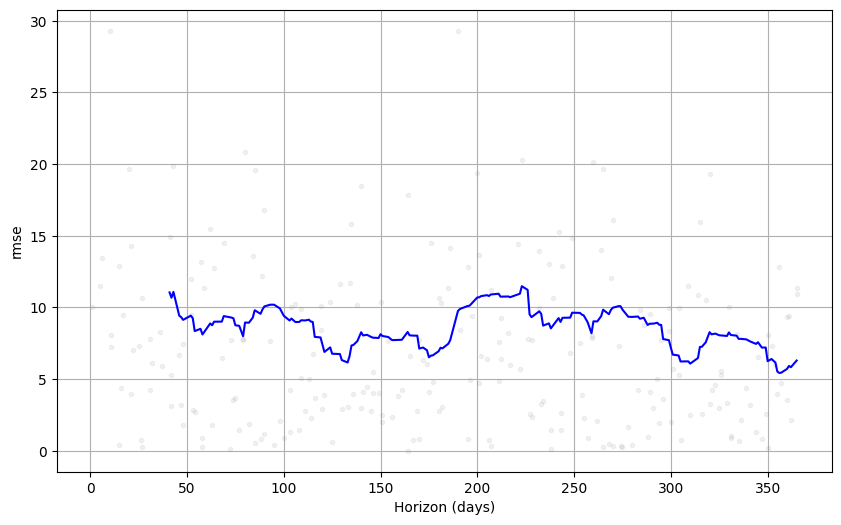

In [81]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')